In [1]:
%matplotlib notebook

# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

ModuleNotFoundError: No module named 'mplleaflet'

In [3]:
#Orginal Data from CSV
df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date']=pd.to_datetime(df['Date']) # Convert dates to Pandas' datetime
df = df[~((df.Date.dt.month == 2) & (df.Date.dt.day == 29))] # Drop leap days
df2=df.copy() #Dataframe for 2015
df=df[df['Date']<'2015-01-01'] #Keep only data between 2005-2014


In [4]:
import numpy as np
a=df.groupby([df['Date'].dt.month.rename('month'),df['Date'].dt.day.rename('day')]).agg({'Data_Value':[np.min, np.max]}) #group by month and then by day   
a.columns=['min','max']
a['min']=a['min']*.10 #convert to degrees Celcius instead of "tenths of degrees"
a['max']=a['max']*.10 #Dito
a.reset_index(inplace=True) #Reset the index so that matplotlib/pyplot can use it as the values for the x-axis
print(a.head(2))
print(a.tail(2))

   month  day   min   max
0      1    1 -16.0  15.6
1      1    2 -26.7  13.9
     month  day   min   max
363     12   30 -14.4  11.7
364     12   31 -15.0  13.9


In [5]:
#Not used to create the graph; however, it was used for testing purposes for the groupby method
#df2=df2[df2['Date']>='2015-01-01'] #Keep data only for 2015 (based on the original data from CSV)
#df2.sort_values('Date', inplace=True)
#df2


In [6]:
df2=df2[df2['Date']>='2015-01-01'] #Keep data only for 2015 (based on the original data from CSV)
b=df2.groupby('Date').agg({'Data_Value':[np.min, np.max]})#Group by the Pandas' datetime
b.columns=['2015min','2015max']
b['2015min']=b['2015min']*.10 #convert to degrees Celcius instead of "tenths of degrees"
b['2015max']=b['2015max']*.10 #Dito
b.reset_index(inplace=True) # Reset the index so that matplotlib/pyplot can use it as the values for the x-axis
print(b.head(2))
print(b.tail(2))

        Date  2015min  2015max
0 2015-01-01    -13.3      1.1
1 2015-01-02    -12.2      3.9
          Date  2015min  2015max
363 2015-12-30     -2.2      6.7
364 2015-12-31     -5.6      1.7


In [7]:
#Create 2015 Dataframes that broke the ten year lows and highs.
temp=b[b['2015min']<a['min']] #All 2015 temperatures that broke the ten year period record lows
temp2=b[b['2015max']>a['max']]#All 2015 temperatures that broke the ten year period record highs


<IPython.core.display.Javascript object>


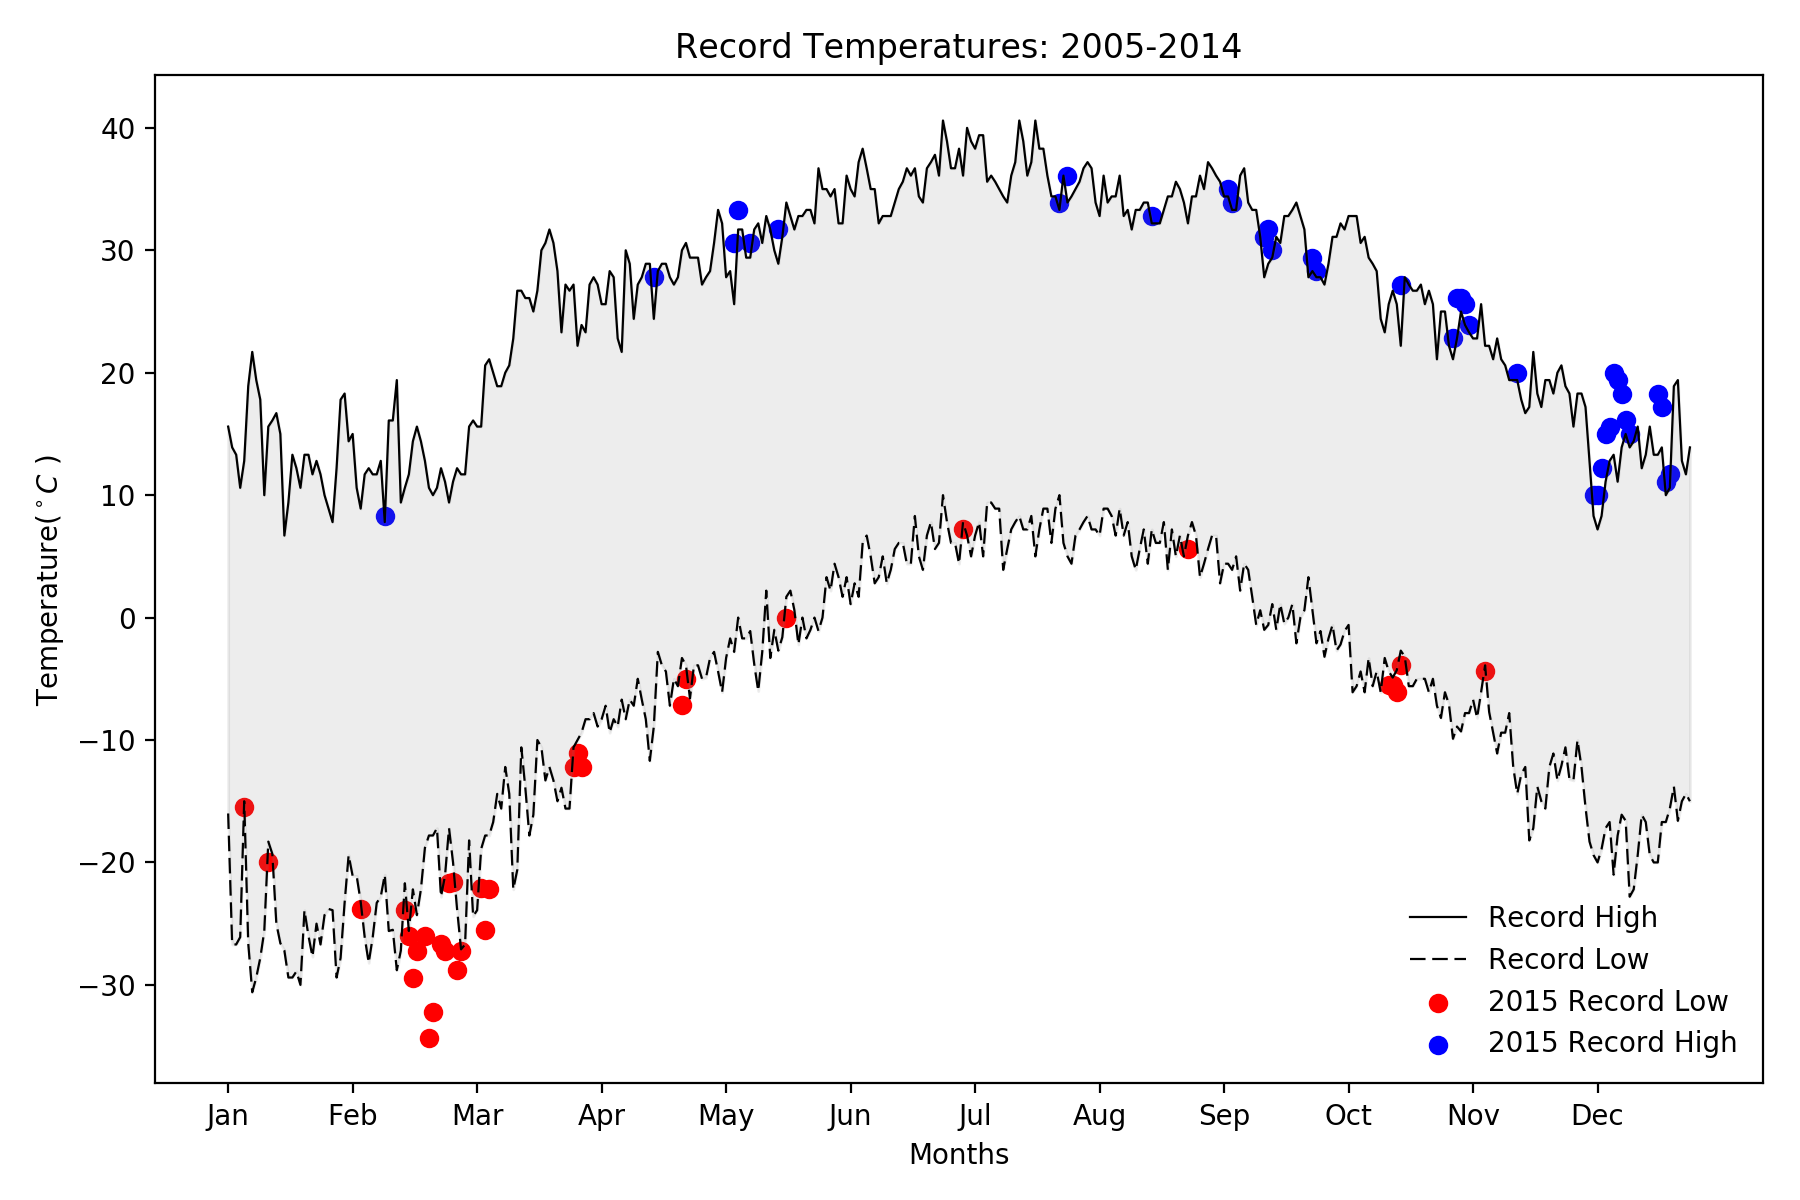

In [17]:
plt.figure(figsize=(9,6)) #create a new figure with the given figsize 
plt.scatter(temp.index,temp['2015min'], c='red', label="2015 Record Low") #Plot 2015 record mins
plt.scatter(temp2.index,temp2['2015max'], c='blue', label="2015 Record High") #Plot 2014 record highs
plt.plot(a['max'],c = 'black', label ='Record High',linewidth=.8) #Plot the record low 10 year period data
plt.plot(a['min'],c = 'black',  label ='Record Low',linestyle='dashed',linewidth=.8 ) #Plot the record high 10 year period data
plt.xticks(np.arange(0,365,31), ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) # set the tick labels
plt.legend(loc = 4, fontsize=10, frameon = False) #Create a legend 
plt.fill_between(a.index,a['min'],a['max'], color='grey',alpha='0.14') #Shaded area
plt.xlabel('Months')
plt.ylabel('Temperature($^\circ C$ ) ')
plt.title("Record Temperatures: 2005-2014")
plt.tight_layout()


In [16]:
plt.savefig("oscar4")